In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import os

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

In [4]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [5]:
from solver import deasolver

In [6]:
results = []
df_imp = pd.DataFrame()

In [7]:
path = "Data/RealData/"

In [8]:
df = pd.read_excel(path + 'egrid2020_data.xlsx', index_col = 0)

In [9]:
df

,Input_Number of generators,Input_Plant nameplate capacity (MW),Input_Plant total annual heat input (MMBtu),Input_Plant annual NOx emissions (tons),Input_Plant annual SO2 emissions (tons),Input_Plant annual CO2 emissions (tons),Input_Plant annual CH4 emissions (lbs),Input_Plant annual N2O emissions (lbs),Output_Plant annual net generation (MWh)
DMU 0001,4,1.5,11554.999,1212.000,19.200,1.675,943.616,76.423,15.285
DMU 0002,8,121.4,115024.996,7646.000,18.056,0.193,6724.603,262.106,27.488
DMU 0003,4,1.9,16506.999,1641.999,26.523,2.393,1348.008,109.175,21.835
DMU 0004,6,2.6,26541.000,2183.001,44.968,3.848,2167.415,175.539,35.108
DMU 0006,7,20.3,753573.992,51137.999,120.560,1.204,44042.277,1661.692,166.221
...,...,...,...,...,...,...,...,...,...
DMU 1729,3,22.5,11058.999,615.999,1.842,0.018,646.338,24.381,2.438
DMU 1730,1,2.7,1335.000,100.000,2.134,0.194,109.020,8.830,1.766
DMU 1731,1,40.0,168852.656,15983.000,4.926,0.100,10034.400,375.908,37.591
DMU 1732,2,2.0,1299.000,85.000,2.078,0.188,106.080,8.591,1.718


In [ ]:
deasolver(inputfile = path + 'egrid2020_data.xlsx', folder = "Data/RealData/", out_suffix1="_Sol")

In [10]:
df_weights = pd.read_excel("Data/RealData/egrid2020_data_Sol.xlsx", index_col = 0).iloc[:, 1:]
df_weights

,Weight_Input_Number of generators,Weight_Input_Plant annual CH4 emissions (lbs),Weight_Input_Plant annual CO2 emissions (tons),Weight_Input_Plant annual N2O emissions (lbs),Weight_Input_Plant annual NOx emissions (tons),Weight_Input_Plant annual SO2 emissions (tons),Weight_Input_Plant nameplate capacity (MW),Weight_Input_Plant total annual heat input (MMBtu),Weight_Output_Plant annual net generation (MWh)
DMU 0001,0.000000,0.0,0.000000,0.009212,0.000237,0.000000,0.005503,0.000000,0.047689
DMU 0002,0.000000,0.0,0.141122,0.001667,0.000069,0.000000,0.000049,0.000000,0.011634
DMU 0003,0.000000,0.0,0.000000,0.005650,0.000204,0.000000,0.025202,0.000000,0.034144
DMU 0004,0.000000,0.0,0.000000,0.003759,0.000136,0.000000,0.016767,0.000000,0.022717
DMU 0006,0.000000,0.0,0.030689,0.000225,0.000011,0.000000,0.000127,0.000000,0.001818
...,...,...,...,...,...,...,...,...,...
DMU 1729,0.000000,0.0,1.622462,0.019167,0.000797,0.000000,0.000567,0.000000,0.133751
DMU 1730,0.004595,0.0,0.000000,0.085009,0.002180,0.000000,0.000000,0.000020,0.444840
DMU 1731,0.000000,0.0,0.289059,0.001763,0.000000,0.062621,0.000000,0.000000,0.009504
DMU 1732,0.000000,0.0,0.000000,0.089900,0.002304,0.000000,0.001592,0.000022,0.470613


In [11]:
df_zero =(df_weights==0).sum()
df_zero

Weight_Input_Number of generators                     1404
Weight_Input_Plant annual CH4 emissions (lbs)         1589
Weight_Input_Plant annual CO2 emissions (tons)         822
Weight_Input_Plant annual N2O emissions (lbs)           17
Weight_Input_Plant annual NOx emissions (tons)         720
Weight_Input_Plant annual SO2 emissions (tons)        1040
Weight_Input_Plant nameplate capacity (MW)            1209
Weight_Input_Plant total annual heat input (MMBtu)    1231
Weight_Output_Plant annual net generation (MWh)          0
dtype: int64

In [12]:
df_zero = (((df_weights==0).sum() / df_weights.shape[0]) * 100).round(2)
df_zero

Weight_Input_Number of generators                     85.40
Weight_Input_Plant annual CH4 emissions (lbs)         96.65
Weight_Input_Plant annual CO2 emissions (tons)        50.00
Weight_Input_Plant annual N2O emissions (lbs)          1.03
Weight_Input_Plant annual NOx emissions (tons)        43.80
Weight_Input_Plant annual SO2 emissions (tons)        63.26
Weight_Input_Plant nameplate capacity (MW)            73.54
Weight_Input_Plant total annual heat input (MMBtu)    74.88
Weight_Output_Plant annual net generation (MWh)        0.00
dtype: float64

### ML

In [16]:
X = df.iloc[:,:-1]
X.head()

,Input_Number of generators,Input_Plant nameplate capacity (MW),Input_Plant total annual heat input (MMBtu),Input_Plant annual NOx emissions (tons),Input_Plant annual SO2 emissions (tons),Input_Plant annual CO2 emissions (tons),Input_Plant annual CH4 emissions (lbs),Input_Plant annual N2O emissions (lbs)
DMU 0001,4,1.5,11554.999,1212.000,19.200,1.675,943.616,76.423
DMU 0002,8,121.4,115024.996,7646.000,18.056,0.193,6724.603,262.106
DMU 0003,4,1.9,16506.999,1641.999,26.523,2.393,1348.008,109.175
DMU 0004,6,2.6,26541.000,2183.001,44.968,3.848,2167.415,175.539
DMU 0006,7,20.3,753573.992,51137.999,120.560,1.204,44042.277,1661.692


In [17]:
X.shape

(1644, 8)

In [18]:
y = df.iloc[:,-1:]
y.head()

,Output_Plant annual net generation (MWh)
DMU 0001,15.285
DMU 0002,27.488
DMU 0003,21.835
DMU 0004,35.108
DMU 0006,166.221


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
std_scaler = StandardScaler()

In [21]:
gb_model = GradientBoostingRegressor(random_state=42)

pipe_gb = make_pipeline(std_scaler, gb_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -9787.081815484047
neg_root_mean_squared_error: -96.93606839443784
r2: 0.9837325291406355


In [ ]:
learning_rate = [1, 0.5, 0.1,  0.01]
n_estimators = [50, 100, 200, 500, 1000, 2000]
max_depth = [3, 5, 10, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
subsample = [0.3, 0.5, 0.75, 1.0]

In [ ]:
# specify parameter values to search
params = {}
params['gradientboostingregressor__learning_rate'] = learning_rate
params['gradientboostingregressor__n_estimators'] = n_estimators
params['gradientboostingregressor__max_depth'] = max_depth
params['gradientboostingregressor__min_samples_split'] = min_samples_split
params['gradientboostingregressor__min_samples_leaf'] = min_samples_leaf
params['gradientboostingregressor__subsample'] = subsample

In [ ]:
grid = RandomizedSearchCV(pipe_gb, params, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X, y.values.ravel())

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

In [22]:
pipe_gb.fit(X,y.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [23]:
imp_gb = pipe_gb.steps[1][1].feature_importances_
imp_gb

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99])

In [24]:
# imp_gb = grid.best_estimator_.steps[1][1].feature_importances_
# imp_gb

In [25]:
df_gb = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_gb}).sort_values("Importance", ascending=False)
df_gb

,Feature Name,Importance
7,Input_Plant annual N2O emissions (lbs),0.986630
5,Input_Plant annual CO2 emissions (tons),0.003546
6,Input_Plant annual CH4 emissions (lbs),0.003242
1,Input_Plant nameplate capacity (MW),0.002616
2,Input_Plant total annual heat input (MMBtu),0.002564
3,Input_Plant annual NOx emissions (tons),0.001094
4,Input_Plant annual SO2 emissions (tons),0.000282
0,Input_Number of generators,0.000027


In [26]:
results = []

In [ ]:
input_imp = list(df_gb["Feature Name"].values)
results.append((0, grid.best_estimator_.steps[1][0], input_imp,
                {"r2" : cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean(),
                "neg_root_mean_squared_error": grid.best_score_}))

In [ ]:
fig = px.bar(df_gb, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=600,
    height=300,
    title_text=f"GradientBoostingRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [ ]:
df_gb

In [ ]:
df_zero.index = ["_".join(f.split("_")[1:]) for f in df_zero.index]

In [ ]:
df_zero

In [ ]:
df_zero.reset_index()

In [ ]:
df_merged = pd.merge(df_gb, df_zero.reset_index(), left_on="Feature Name", right_on="index")
df_merged.rename(columns = {0: "Zero_Count"}, inplace=True)
df_merged

In [ ]:
fig = px.scatter(df_merged[~df_merged["Feature Name"].str.contains("Output")], x="Zero_Count", y="Importance",
                hover_data=["Feature Name"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"GradientBoostingRegressor Feature Importance - Zero_Count Relationship",
)

fig.show()

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df_weights.eq(0).transpose(),
        cmap="YlGnBu",
        cbar=False,
        cbar_kws={'label': 'Zero Values'});

In [ ]:
results 

In [ ]:
deasolver(inputfile="Data/RealData/egrid2020_data.xlsx", folder = "Data/RealData/", out_suffix1="_Sol_1", input_imp = results[0])

In [29]:
df_weights_1 = pd.read_excel("Data/RealData/egrid2020_data_Sol_1.xlsx", index_col = 0).iloc[:, 1:]
df_weights_1

,Weight_Input_Number of generators,Weight_Input_Plant annual CH4 emissions (lbs),Weight_Input_Plant annual CO2 emissions (tons),Weight_Input_Plant annual N2O emissions (lbs),Weight_Input_Plant annual NOx emissions (tons),Weight_Input_Plant annual SO2 emissions (tons),Weight_Input_Plant nameplate capacity (MW),Weight_Input_Plant total annual heat input (MMBtu),Weight_Output_Plant annual net generation (MWh)
DMU 0001,0.0,4.884223e-05,0.000049,0.004321,4.884223e-05,0.000000e+00,4.884223e-05,4.884223e-05,0.033883
DMU 0002,0.0,1.272861e-07,0.003750,0.003750,1.272861e-07,0.000000e+00,1.272861e-07,1.272861e-07,0.008497
DMU 0003,0.0,3.429496e-05,0.000034,0.003034,3.429496e-05,0.000000e+00,3.429496e-05,3.429496e-05,0.023791
DMU 0004,0.0,2.153972e-05,0.000022,0.001905,2.153972e-05,0.000000e+00,2.153972e-05,2.153972e-05,0.014943
DMU 0006,0.0,2.006648e-08,0.000591,0.000591,2.006648e-08,0.000000e+00,2.006648e-08,2.006648e-08,0.001339
...,...,...,...,...,...,...,...,...,...
DMU 1729,0.0,1.367822e-06,0.040293,0.040293,1.367822e-06,0.000000e+00,1.367822e-06,1.367822e-06,0.091306
DMU 1730,0.0,4.295521e-04,0.000430,0.037998,4.295521e-04,0.000000e+00,4.295521e-04,4.295521e-04,0.297994
DMU 1731,0.0,8.872102e-08,0.002614,0.002614,8.872102e-08,8.872102e-08,8.872102e-08,8.872102e-08,0.005922
DMU 1732,0.0,4.440066e-04,0.000444,0.039276,4.440066e-04,0.000000e+00,4.440066e-04,4.440066e-04,0.308021


In [30]:
df_es = pd.read_excel("Data/RealData/egrid2020_data_Sol.xlsx", index_col = 0).iloc[:, :1]
df_es_1 = pd.read_excel("Data/RealData/egrid2020_data_Sol_1.xlsx", index_col = 0).iloc[:, :1]

In [31]:
es = (df_es.Efficiency_Scores==1).sum()
print(f"count of efficient units : {es}")

count of efficient units : 23


In [32]:
es_1 = (df_es_1.Efficiency_Scores==1).sum()
print(f"count of efficient units : {es_1}")

count of efficient units : 6


In [33]:
df_zero =(df_weights==0).sum()
df_zero

Weight_Input_Number of generators                     1404
Weight_Input_Plant annual CH4 emissions (lbs)         1589
Weight_Input_Plant annual CO2 emissions (tons)         822
Weight_Input_Plant annual N2O emissions (lbs)           17
Weight_Input_Plant annual NOx emissions (tons)         720
Weight_Input_Plant annual SO2 emissions (tons)        1040
Weight_Input_Plant nameplate capacity (MW)            1209
Weight_Input_Plant total annual heat input (MMBtu)    1231
Weight_Output_Plant annual net generation (MWh)          0
dtype: int64

In [34]:
df_zero =(df_weights_1==0).sum()
df_zero

Weight_Input_Number of generators                     1447
Weight_Input_Plant annual CH4 emissions (lbs)          316
Weight_Input_Plant annual CO2 emissions (tons)          43
Weight_Input_Plant annual N2O emissions (lbs)            0
Weight_Input_Plant annual NOx emissions (tons)          89
Weight_Input_Plant annual SO2 emissions (tons)        1190
Weight_Input_Plant nameplate capacity (MW)             367
Weight_Input_Plant total annual heat input (MMBtu)      97
Weight_Output_Plant annual net generation (MWh)          0
dtype: int64

In [35]:
df_zero_1_perc = (((df_weights_1==0).sum() / df_weights_1.shape[0]) * 100).round(2)
df_zero_1_perc

Weight_Input_Number of generators                     88.02
Weight_Input_Plant annual CH4 emissions (lbs)         19.22
Weight_Input_Plant annual CO2 emissions (tons)         2.62
Weight_Input_Plant annual N2O emissions (lbs)          0.00
Weight_Input_Plant annual NOx emissions (tons)         5.41
Weight_Input_Plant annual SO2 emissions (tons)        72.38
Weight_Input_Plant nameplate capacity (MW)            22.32
Weight_Input_Plant total annual heat input (MMBtu)     5.90
Weight_Output_Plant annual net generation (MWh)        0.00
dtype: float64

In [36]:
df_es

,Efficiency_Scores
DMU 0001,0.728929
DMU 0002,0.319788
DMU 0003,0.745540
DMU 0004,0.797534
DMU 0006,0.302185
...,...
DMU 1729,0.326085
DMU 1730,0.785587
DMU 1731,0.357247
DMU 1732,0.808513


In [37]:
df_es_1

,Efficiency_Scores
DMU 0001,0.517907
DMU 0002,0.233557
DMU 0003,0.519487
DMU 0004,0.524611
DMU 0006,0.222652
...,...
DMU 1729,0.222604
DMU 1730,0.526257
DMU 1731,0.222627
DMU 1732,0.529180


In [38]:
df_res = df_es.join(df_es_1, lsuffix = "_Basic", rsuffix="_with_ML")

In [39]:
df_res["Diff"] = df_res["Efficiency_Scores_Basic"]  - df_res["Efficiency_Scores_with_ML"]
df_res["Diff_Perc"] = (df_res["Diff"] / df_res["Efficiency_Scores_Basic"]) * 100 
df_res["Diff_Perc < 10"] = np.abs(df_res["Diff_Perc"]) < 10  
df_res = df_res.round(4)
df_res

,Efficiency_Scores_Basic,Efficiency_Scores_with_ML,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.7289,0.5179,0.2110,28.9496,False
DMU 0002,0.3198,0.2336,0.0862,26.9649,False
DMU 0003,0.7455,0.5195,0.2261,30.3207,False
DMU 0004,0.7975,0.5246,0.2729,34.2209,False
DMU 0006,0.3022,0.2227,0.0795,26.3193,False
...,...,...,...,...,...
DMU 1729,0.3261,0.2226,0.1035,31.7345,False
DMU 1730,0.7856,0.5263,0.2593,33.0110,False
DMU 1731,0.3572,0.2226,0.1346,37.6825,False
DMU 1732,0.8085,0.5292,0.2793,34.5489,False


In [40]:
blue = df_res["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(df_res["Diff_Perc < 10"]) - (df_res["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  366
red :  1278


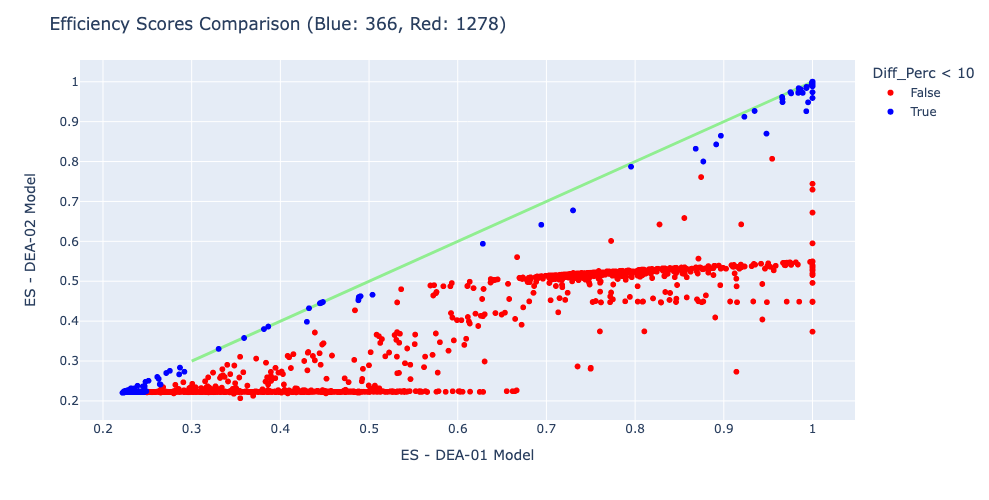

In [41]:
fig = px.scatter(df_res, x="Efficiency_Scores_Basic", y="Efficiency_Scores_with_ML", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_with_ML", "Diff_Perc"] + [df_res.index])

fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
    yaxis_title="ES - DEA-02 Model",
    xaxis_title="ES - DEA-01 Model"
)

fig.show()

In [42]:
colors = np.linspace(0.2, 1, len(df_res))

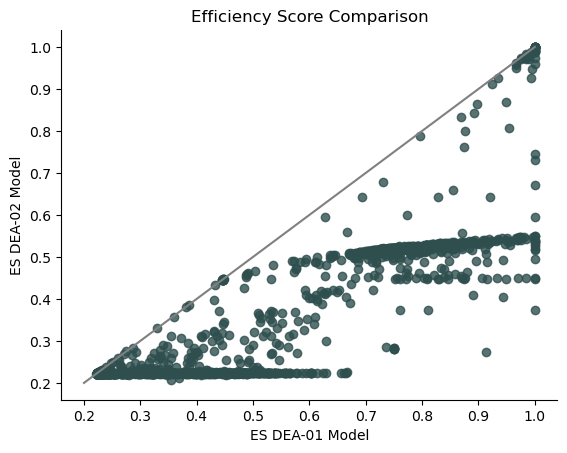

In [43]:
# Show the boundary between the regions:
# theta = np.arange(0, np.pi / 2, 0.01)
# plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))
# colors = np.arange(0, 1, len(df_res))
# Hide the upper and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(df_res["Efficiency_Scores_Basic"], y = df_res["Efficiency_Scores_with_ML"], c = "darkslategray", alpha = 0.8)

x_line = np.linspace(0.2, 1, 10)
y_line = x_line
plt.plot(x_line, y_line, color='gray')


plt.xlabel("ES DEA-01 Model")
plt.ylabel("ES DEA-02 Model")
plt.title("Efficiency Score Comparison")
plt.savefig("Viz/ES Comparison.png")

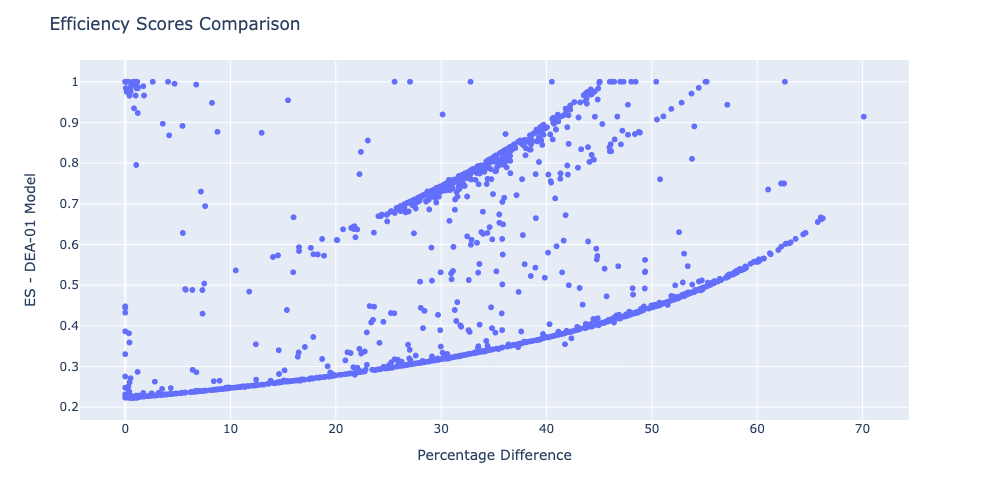

In [44]:
fig = px.scatter(df_res, y="Efficiency_Scores_Basic", x="Diff_Perc",
                 hover_data=["Efficiency_Scores_Basic", "Diff_Perc"] + [df_res.index])

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison",
    yaxis_title="ES - DEA-01 Model",
    xaxis_title="Percentage Difference"
)

fig.show()

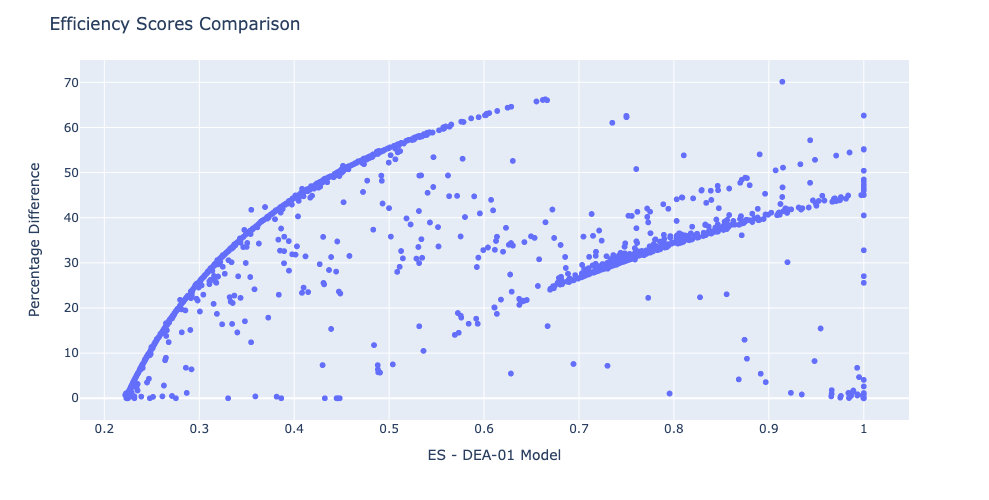

In [45]:
fig = px.scatter(df_res, x="Efficiency_Scores_Basic", y="Diff_Perc",
                 hover_data=["Efficiency_Scores_Basic", "Diff_Perc"] + [df_res.index])

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison",
    xaxis_title="ES - DEA-01 Model",
    yaxis_title="Percentage Difference"
)

fig.show()

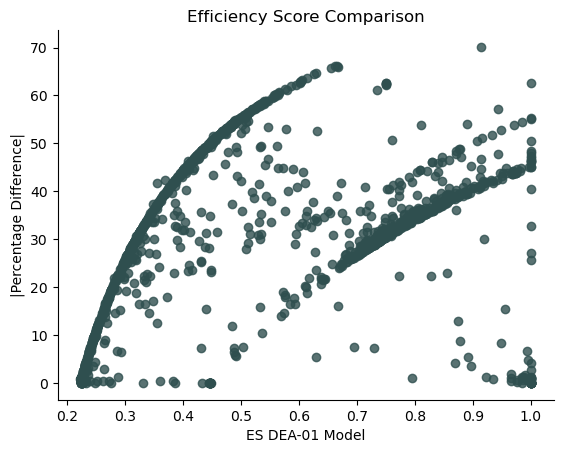

In [46]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(df_res["Efficiency_Scores_Basic"], y = df_res["Diff_Perc"], c = "darkslategray", alpha = 0.8)

plt.xlabel("ES DEA-01 Model")
plt.ylabel("|Percentage Difference|")
plt.title("Efficiency Score Comparison")
plt.savefig("Viz/ES Comparison_1.png")

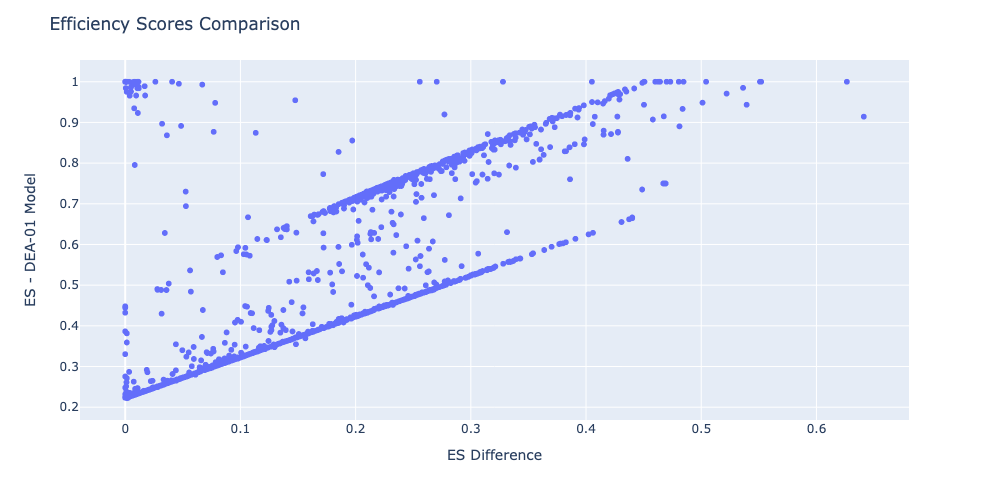

In [47]:
fig = px.scatter(df_res, y="Efficiency_Scores_Basic", x="Diff",
                 hover_data=["Efficiency_Scores_Basic", "Diff"] + [df_res.index])

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison",
    yaxis_title="ES - DEA-01 Model",
    xaxis_title="ES Difference"
)

fig.show()

In [48]:
df_w = (df_weights.iloc[:, :-1] == 0).sum(axis=1).reset_index()
df_w.columns = ["DMU", "DEA-01 Zero Count"]
df_w

,DMU,DEA-01 Zero Count
0,DMU 0001,5
1,DMU 0002,4
2,DMU 0003,5
3,DMU 0004,5
4,DMU 0006,4
...,...,...
1639,DMU 1729,4
1640,DMU 1730,4
1641,DMU 1731,5
1642,DMU 1732,4


In [49]:
df_w1 = (df_weights_1.iloc[:, :-1] == 0).sum(axis=1).reset_index()
df_w1.columns = ["DMU", "DEA-02 Zero Count"]
df_w1

,DMU,DEA-02 Zero Count
0,DMU 0001,2
1,DMU 0002,2
2,DMU 0003,2
3,DMU 0004,2
4,DMU 0006,2
...,...,...
1639,DMU 1729,2
1640,DMU 1730,2
1641,DMU 1731,1
1642,DMU 1732,2


In [50]:
df_w_merged = df_w.merge(df_w1)

In [51]:
df_w_merged

,DMU,DEA-01 Zero Count,DEA-02 Zero Count
0,DMU 0001,5,2
1,DMU 0002,4,2
2,DMU 0003,5,2
3,DMU 0004,5,2
4,DMU 0006,4,2
...,...,...,...
1639,DMU 1729,4,2
1640,DMU 1730,4,2
1641,DMU 1731,5,1
1642,DMU 1732,4,2


In [52]:
df_w_merged[df_w_merged["DEA-01 Zero Count"] > df_w_merged["DEA-02 Zero Count"]].shape

(1604, 3)

In [53]:
df_w_merged[df_w_merged["DEA-01 Zero Count"] == df_w_merged["DEA-02 Zero Count"]].shape

(32, 3)

In [54]:
df_w_merged[df_w_merged["DEA-01 Zero Count"] < df_w_merged["DEA-02 Zero Count"]].shape

(8, 3)

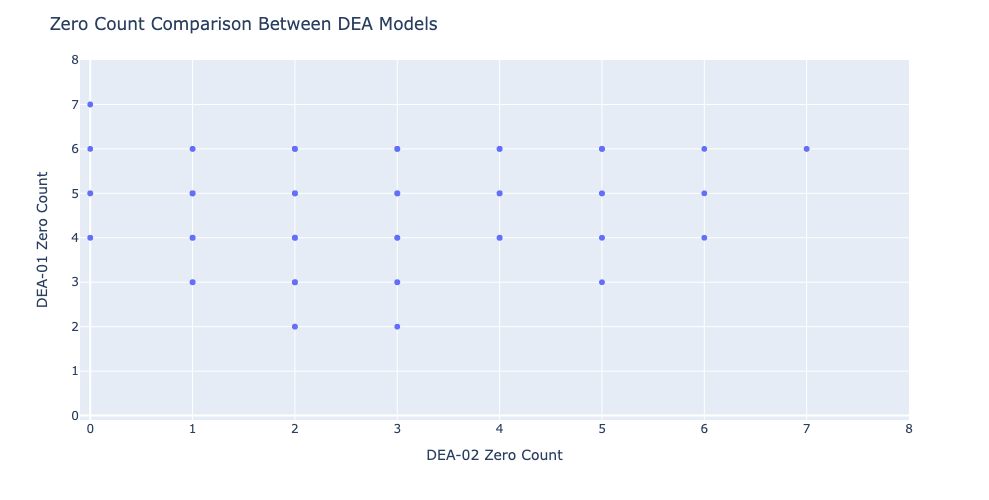

In [55]:
fig = px.scatter(df_w_merged, x="DEA-02 Zero Count", y="DEA-01 Zero Count")

# fig.add_traces(
#     list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
# )

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Zero Count Comparison Between DEA Models",
    yaxis_range = [-0.1,8],
    xaxis_range = [-0.1,8],
#    xaxis_title="ES - 2nd DEA Model",
#    yaxis_title="ES - 1st DEA Model"
)

fig.show()

In [56]:
df_w_merged_gr = df_w_merged.groupby(["DEA-02 Zero Count", "DEA-01 Zero Count"], as_index = False).size()
df_w_merged_gr

,DEA-02 Zero Count,DEA-01 Zero Count,size
0,0,4,4
1,0,5,7
2,0,6,1
3,0,7,2
4,1,3,10
...,...,...,...
24,5,6,43
25,6,4,1
26,6,5,1
27,6,6,1


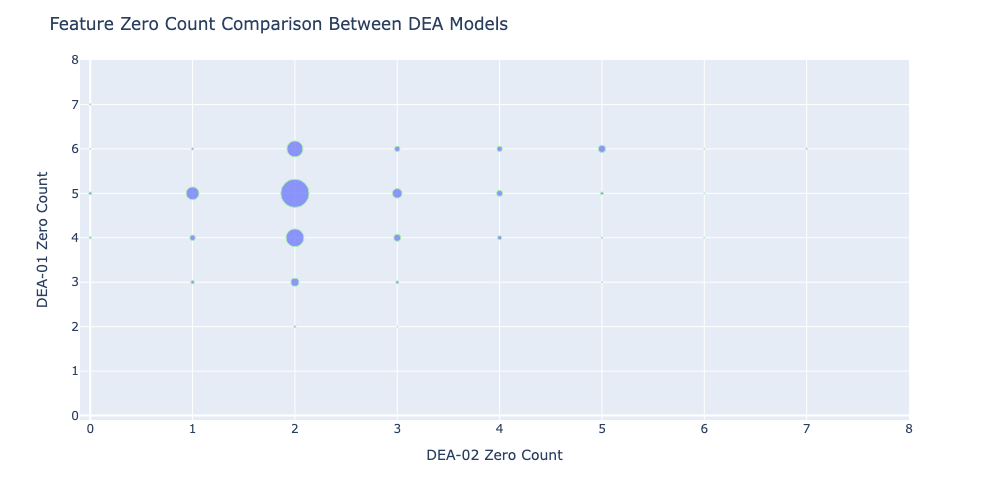

In [57]:
fig = px.scatter(df_w_merged_gr, x="DEA-02 Zero Count", y="DEA-01 Zero Count", size = "size")

# fig.add_traces(
#     list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
# )

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Feature Zero Count Comparison Between DEA Models",
    yaxis_range = [-0.1,8],
    xaxis_range = [-0.1,8],
#    xaxis_title="ES - 2nd DEA Model",
#    yaxis_title="ES - 1st DEA Model"
)

fig.show()

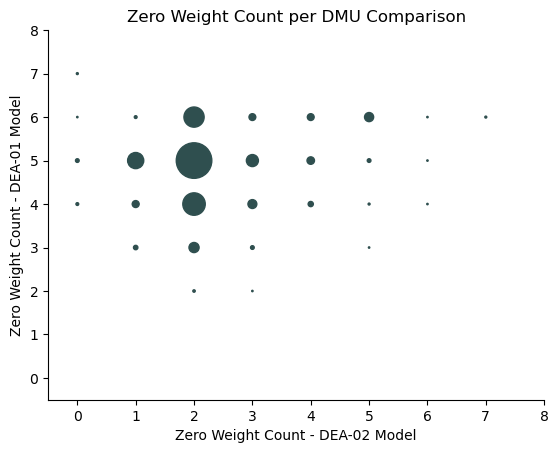

In [60]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.scatter(x = df_w_merged_gr["DEA-02 Zero Count"], y = df_w_merged_gr["DEA-01 Zero Count"], s = df_w_merged_gr["size"], c = "darkslategray")

# Set the x-axis range
plt.ylim(-0.5, 8)
plt.xlim(-0.5, 8)

plt.xlabel("Zero Weight Count - DEA-02 Model")
plt.ylabel("Zero Weight Count - DEA-01 Model")
plt.title("Zero Weight Count per DMU Comparison")
plt.savefig("Viz/Zero Weight Comparison.png")

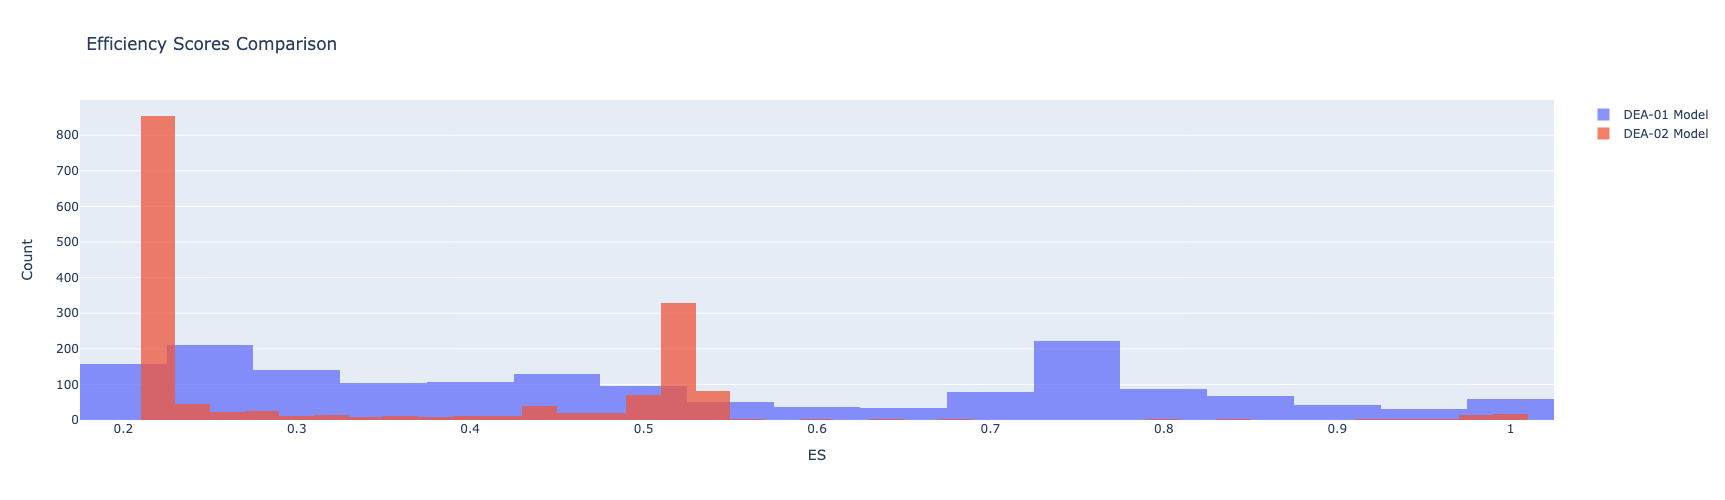

In [43]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_res["Efficiency_Scores_Basic"], name= "DEA-01 Model"))
fig.add_trace(go.Histogram(x=df_res["Efficiency_Scores_with_ML"], name= "DEA-02 Model"))

# Overlay both histograms
fig.update_layout(barmode='overlay')

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison",
    yaxis_title="Count",
    xaxis_title="ES"
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

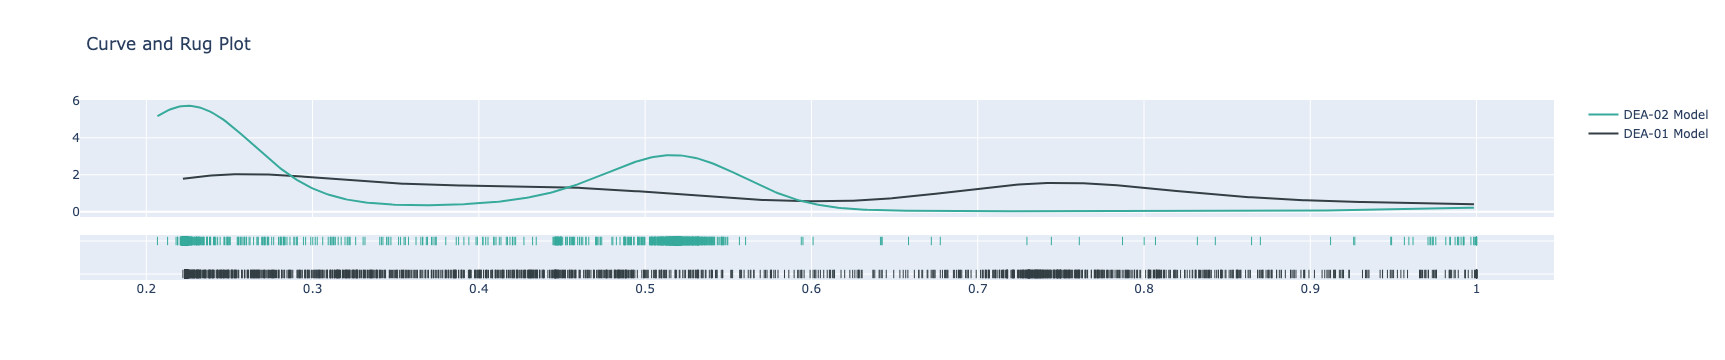

In [44]:
hist_data = [df_res["Efficiency_Scores_Basic"], df_res["Efficiency_Scores_with_ML"]]

group_labels = ['DEA-01 Model', 'DEA-02 Model']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='Curve and Rug Plot')
fig.show()

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



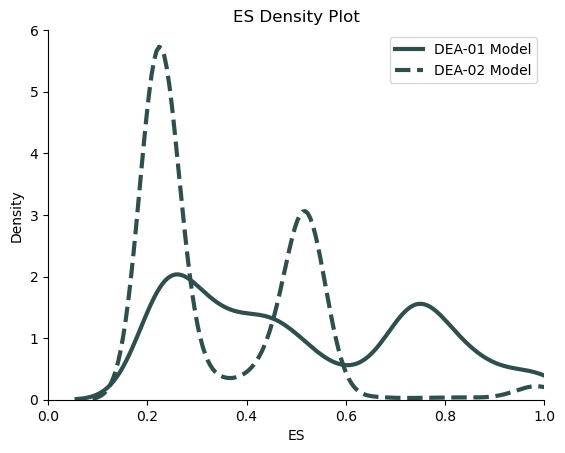

In [75]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for col, label, ls in zip(["Efficiency_Scores_Basic", "Efficiency_Scores_with_ML"], ["DEA-01 Model", "DEA-02 Model"], ["solid", "dashed"]):
    sns.distplot(df_res[col], hist = False, kde = True,
                 kde_kws = {'linewidth': 3,
                           'linestyle': ls},
                 label = label,
                color = "darkslategray",
                vertical=False)
    
# Plot formatting
plt.legend(prop={'size': 10})
plt.title('ES Density Plot')
plt.xlabel('ES')
plt.ylabel('Density')

# Set the x-axis range
plt.ylim(0, 6)
plt.xlim(0, 1)
plt.savefig("Viz/Density.png")

In [ ]:
pyplot.hist(df_res["Efficiency_Scores_Basic"], alpha=0.5, label='DEA-01 Model')
pyplot.hist(df_res["Efficiency_Scores_with_ML"], alpha=0.5, label='DEA-01 Model')
pyplot.legend(loc='upper right')
pyplot.show()